In [1]:
import torch
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [2]:
pip install tensorboard

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\keshavaram\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [5]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  
])


In [6]:



dataset = datasets.ImageFolder(root='rice_images', transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True, pin_memory=True)

images, labels = next(iter(dataloader))
images, labels = images.to(device), labels.to(device)

images, labels = next(iter(dataloader))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


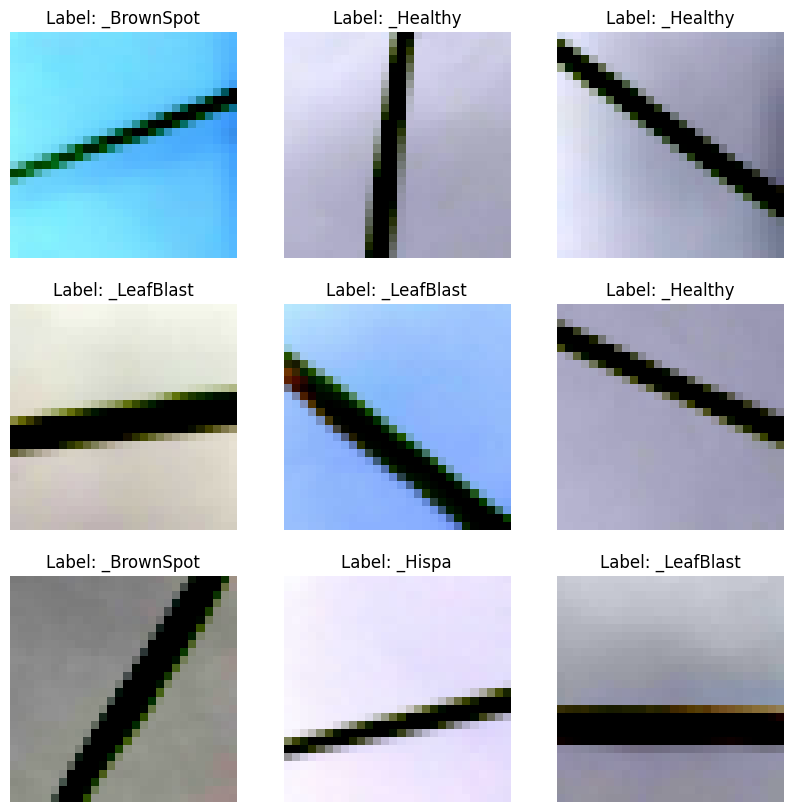

In [7]:

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].permute(1, 2, 0), cmap='gray')  
    plt.title(f"Label: {dataset.classes[labels[i]]}")
    plt.axis('off')
plt.show()



In [8]:
class RBFNet(nn.Module):
    def __init__(self, input_size, num_classes, num_centers=2, sigma=1.0):
        super(RBFNet, self).__init__()
        self.num_centers = num_centers
        self.centers = nn.Parameter(torch.randn(num_centers, input_size))
        self.sigma = nn.Parameter(torch.tensor(sigma))
        self.fc = nn.Linear(num_centers, num_classes)

    def forward(self, x):
        size = x.size(0)
        x = x.view(size, -1)
        c = self.centers.view(1, self.num_centers, -1)
        phi = self.rbf_kernel(x, c, self.sigma)
        return self.fc(phi)

    def rbf_kernel(self, x, centers, sigma):
        x = x.unsqueeze(1)  
        distances = torch.norm(x - centers, dim=2)
        return torch.exp(-(distances ** 2) / (2 * sigma**2))
    


In [9]:

input_size = 3 * 28 * 28
num_classes = 4
num_centers = 2
sigma = 1.0  
model = RBFNet(input_size, num_classes, num_centers, sigma).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
train_losses = []


Epoch [1/10], Loss: 1.3793
Epoch [2/10], Loss: 1.2936
Epoch [3/10], Loss: 1.2563
Epoch [4/10], Loss: 1.4628
Epoch [5/10], Loss: 1.3483
Epoch [6/10], Loss: 1.1137
Epoch [7/10], Loss: 1.3352
Epoch [8/10], Loss: 1.2293
Epoch [9/10], Loss: 1.2056
Epoch [10/10], Loss: 1.2467


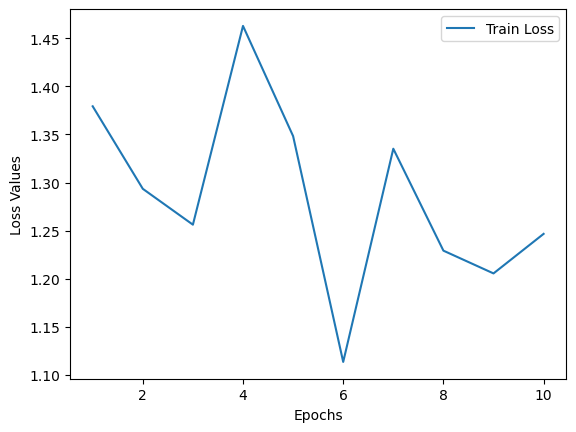

In [10]:


for epoch in range(num_epochs):
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")
    train_losses.append(loss.item())

plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Values')
plt.legend()
plt.show()


In [11]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in dataloader:  
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

Validation Accuracy: 44.35%
